#  Physics 113 Final Project

In this project I will attempt to build a Molecular Dynamics simulation from scratch. It should be able to simulate the forces and trajectories of a given number of neutral gas particles in a box of given dimensions. I will also attempt to graph the positions and forces, and also attempt to show a graphical representations of the particle trajectories.

## Background 

Molecular Dynamics (MD) simulation is a computational technique that is used to study the motion and interactions of atoms and molecules over time. It is a simulation method that involves the numerical integration of classical equations of motion of the atoms and molecules in a system, using classical mechanics principles, such as Newton's laws of motion. 

First let us import some helpful packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Defining a Potential

In order to calculate forces between particles, we need a potential. For this project, I have decided to use a Lennard Jones potential. From Wikipedia, "The Lennard-Jones potential models soft repulsive and attractive (van der Waals) interactions. Hence, the Lennard-Jones potential describes electronically neutral atoms or molecules." Thus it is the best choice of potential for our simulation of neutral gas molecules. It has the mathematical form 

$$
V(r) = 4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right]
$$

where $V(r)$ is the potential energy, $\epsilon$ is the depth of the potential well, $\sigma$ is the distance at which the potential is zero, and $r$ is the distance between particles.


Let us define it now. 

In [2]:
def lj_potential(r):
    """With arbitrary values for sigma and epsilon"""
    sigma = 1.0
    epsilon = 1.0
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

## Calculating Forces

Now that we have a potential, we can use it to calculate forces between particle pairs. Since our potential is a fucntion of distance r, our force computation function will have arguments of particle distance and box size. An important thing to note here is the boundary condition, i.e what happens at the walls of the box. I have chosen to apply Periodic Boundary conditions. From Wikipedia, "Periodic boundary conditions (PBCs) are a set of boundary conditions which are often chosen for approximating a large (infinite) system by using a small part called a unit cell... the geometry of the unit cell satisfies perfect two-dimensional tiling, and when an object passes through one side of the unit cell, it re-appears on the opposite side with the same velocity." The PBC allows the simulation to be repeatable to build a much larger simulation if we'd like.

In [5]:
def compute_forces(positions, box_size):
    num_particles = positions.shape[0]
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            r = positions[j] - positions[i]
            r -= np.round(r / box_size) * box_size  # Apply periodic boundary conditions
            distance = np.linalg.norm(r)
            force_magnitude = lj_potential(distance) / distance
            forces[i] += force_magnitude * r
            forces[j] -= force_magnitude * r
    return forces

## Applying a Numerical Method - Verlet Integration

Now we must use a numerical integration method to solve for the positions and velocities of the particles as the system evolves. We will use a method called Verlet Integration, which is a numerical integration method that is used to integrate Newton's equations of motion.

In [6]:
def verlet_integration(positions, velocities, forces, dt, box_size):
    """Perform a single step of the Verlet integration."""
    new_positions = positions + velocities * dt + 0.5 * forces * dt**2
    new_positions = new_positions % box_size  # Apply periodic boundary conditions
    new_forces = compute_forces(new_positions, box_size)
    new_velocities = velocities + 0.5 * (forces + new_forces) * dt
    return new_positions, new_velocities, new_forces

## Inititialising the Simulation 

Step: 1 Positions: [[9.61142293 4.77644862 9.17714317]
 [3.77893654 7.00501424 3.69528459]
 [7.87011568 4.5604803  7.25758059]
 [6.01049613 3.24414543 1.44142305]
 [0.5232587  7.16466569 2.77788922]
 [0.24233533 7.61738717 8.71017435]
 [9.76642719 2.24759752 2.05327249]
 [3.24482736 5.18972582 5.24826608]
 [0.02017148 4.16900319 5.78055488]
 [6.12518281 5.71365041 9.53106039]
 [8.66254692 9.7636079  0.68040113]
 [0.46526743 3.49963041 2.87434534]
 [1.90366818 4.80287124 6.44025185]
 [8.56016015 2.0531646  1.96481531]
 [5.68673028 3.6428154  7.33661572]
 [3.82990102 3.32620827 5.81370889]
 [9.39797221 5.07190155 5.11162665]
 [6.78803969 1.62260712 0.84724056]
 [8.59902289 3.95868921 5.82964762]
 [9.65961285 7.09978719 4.69722838]]
Step: 1 Velocities: [[-2.34567211 -0.22714396 -0.25943451]
 [-1.46366097 -1.02229002  0.76303848]
 [-1.26149339  2.05835718 -0.09622064]
 [-1.85250803  0.36460002 -0.41726058]
 [ 0.19149434 -0.42954885  1.93847261]
 [-0.08860397 -0.12267539  1.53394111]
 [-1.0

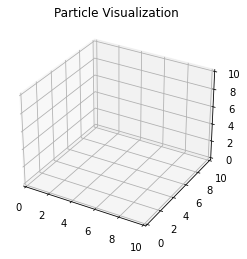

In [33]:
def main():
    num_particles = 20
    box_size = 10.0
    num_steps = 10
    dt = 0.01 

    # Initialize positions and velocities randomly
    positions = np.random.rand(num_particles, 3) * box_size
    velocities = np.random.randn(num_particles, 3)

    # Initialize array to store position history
    positions_history = [positions.copy()]

    # Main simulation loop
    for step in range(num_steps):
        forces = compute_forces(positions, box_size)
        positions, velocities, forces = verlet_integration(positions, velocities, forces, dt, box_size)
        positions_history.append(positions.copy())
        print("Step:", step + 1, "Positions:", positions)
        print("Step:", step + 1, "Velocities:", velocities)

    

if __name__ == "__main__":
    main()

Success! We are printing positions and velocities for our particles under the L-J Potential. 


## Increasing Complexity

Can we try and increase the complexity and run the simulation for two different species of molecules with different masses?

## Calculating Forces

Now that we have two species of particles, we need to take into pair-interactions between different particle species. We can modify our original force calculation function as follows.

In [3]:
def compute_forces(positions_species1, positions_species2, masses_species1, masses_species2, box_size):
    """Compute the forces between particles."""
    num_species1 = positions_species1.shape[0]  # Get the number of particles in species 1
    num_species2 = positions_species2.shape[0]  # Get the number of particles in species 2

    forces_species1 = np.zeros_like(positions_species1)  # Initialize forces for species 1
    forces_species2 = np.zeros_like(positions_species2)  # Initialize forces for species 2

    for i in range(num_species1):
        for j in range(i+1, num_species1):
            r = positions_species1[i] - positions_species1[j]  # Calculate the vector difference between particles
            r = r - np.rint(r / box_size) * box_size  # Apply periodic boundary conditions
            r_sq = np.sum(r**2)  # Calculate the squared distance between particles
            r_sq_inv = 1 / r_sq  # Calculate the inverse of the squared distance
            r_sq_inv6 = r_sq_inv**3  # Calculate r^(-6)
            r_sq_inv12 = r_sq_inv6**2  # Calculate r^(-12)
            force = 24 * ((2 * r_sq_inv12) - r_sq_inv6) * r_sq_inv * r  # Calculate the Lennard-Jones force
            forces_species1[i] += force  # Add the force to particle i of species 1
            forces_species1[j] -= force  # Subtract the force from particle j of species 1

    for i in range(num_species2):
        for j in range(i+1, num_species2):
            r = positions_species2[i] - positions_species2[j]
            r = r - np.rint(r / box_size) * box_size
            r_sq = np.sum(r**2)
            r_sq_inv = 1 / r_sq
            r_sq_inv6 = r_sq_inv**3
            r_sq_inv12 = r_sq_inv6**2
            force = 24 * ((2 * r_sq_inv12) - r_sq_inv6) * r_sq_inv * r
            forces_species2[i] += force
            forces_species2[j] -= force

    for i in range(num_species1):
        for j in range(num_species2):
            r = positions_species1[i] - positions_species2[j]
            r = r - np.rint(r / box_size) * box_size
            r_sq = np.sum(r**2)
            r_sq_inv = 1 / r_sq
            r_sq_inv6 = r_sq_inv**3
            r_sq_inv12 = r_sq_inv6**2
            force = 24 * ((2 * r_sq_inv12) - r_sq_inv6) * r_sq_inv * r
            forces_species1[i] += force
            forces_species2[j] -= force

    forces_species1 *= masses_species1[:, np.newaxis]  # Multiply the forces of species 1 by their corresponding masses
    forces_species2 *= masses_species2[:, np.newaxis]  # Multiply the forces of species 2 by their corresponding masses

    return forces_species1, forces_species2  # Return the computed forces for both species

## Verlet Integration 

We also need to modify our Verlet Integration function to take into account different particle species and masses, and pair-interactions.

In [4]:
def verlet_integration(positions_species1, positions_species2, velocities_species1, velocities_species2, forces_species1, forces_species2, masses_species1, masses_species2, dt, box_size):
    """Perform a single step of the Verlet integration."""
    
    # Calculate accelerations for each species
    accelerations_species1 = forces_species1 / masses_species1[:, np.newaxis]
    accelerations_species2 = forces_species2 / masses_species2[:, np.newaxis]

    # Update positions based on current positions, velocities, and accelerations
    new_positions_species1 = positions_species1 + velocities_species1 * dt + 0.5 * accelerations_species1 * dt**2
    new_positions_species2 = positions_species2 + velocities_species2 * dt + 0.5 * accelerations_species2 * dt**2

    # Apply periodic boundary conditions to the new positions
    new_positions_species1 = new_positions_species1 % box_size
    new_positions_species2 = new_positions_species2 % box_size

    # Calculate new forces based on the updated positions
    new_forces_species1, new_forces_species2 = compute_forces(new_positions_species1, new_positions_species2, masses_species1, masses_species2, box_size)

    # Update velocities based on current velocities, forces, and masses
    new_velocities_species1 = velocities_species1 + 0.5 * (forces_species1 + new_forces_species1) / masses_species1[:, np.newaxis] * dt
    new_velocities_species2 = velocities_species2 + 0.5 * (forces_species2 + new_forces_species2) / masses_species2[:, np.newaxis] * dt

    return new_positions_species1, new_positions_species2, new_velocities_species1, new_velocities_species2, new_forces_species1, new_forces_species2

Now we can initialise the simulation.

In [6]:
def main():
    num1 = 20
    num2 = 30
    box_size = 10.0
    num_steps = 25
    dt = 0.01

    # Initialize positions, velocities, and masses randomly for two species
    positions_species1 = np.random.rand(num1, 3) * box_size
    positions_species2 = np.random.rand(num2, 3) * box_size
    velocities_species1 = np.random.randn(num1, 3)
    velocities_species2 = np.random.randn(num2, 3)
    masses_species1 = np.random.uniform(low=1, high=2, size=num1)
    masses_species2 = np.random.uniform(low=2, high=3, size=num2)

    # Initialize array to store position history for each species
    positions_history_species1 = [positions_species1.copy()]
    positions_history_species2 = [positions_species2.copy()]

    # Main simulation loop
    for step in range(num_steps):
        # Species 1 simulation
        forces_species1, forces_species2 = compute_forces(positions_species1, positions_species2, masses_species1, masses_species2, box_size)
        positions_species1, positions_species2, velocities_species1, velocities_species2, forces_species1, forces_species2 = verlet_integration(positions_species1, positions_species2, velocities_species1, velocities_species2, forces_species1, forces_species2, masses_species1, masses_species2, dt, box_size)
        positions_history_species1.append(positions_species1.copy())
        positions_history_species2.append(positions_species2.copy())

        print("Step:", step + 1, "Positions Species 1:", positions_species1)
        print("Step:", step + 1, "Positions Species 2:", positions_species2)
        print("Step:", step + 1, "Velocities Species 1:", velocities_species1)
        print("Step:", step + 1, "Velocities Species 2:", velocities_species2)


    
if __name__ == "__main__":
    main()

Step: 1 Positions Species 1: [[9.11679305 6.67116193 4.44071451]
 [5.55332213 5.45953116 9.27290918]
 [1.92750832 1.49126878 5.48642679]
 [2.78805957 1.68469135 2.01164175]
 [4.97259614 8.3659646  0.72101992]
 [5.0252162  3.34076335 5.84846618]
 [3.84663425 0.20560983 7.76904296]
 [6.39027845 8.77065709 0.95215532]
 [5.07674966 7.01620932 0.70976856]
 [0.09341201 1.87198467 7.23837451]
 [2.901392   9.60067916 3.48852447]
 [5.63894182 6.77699669 0.12169613]
 [0.77134718 4.85367487 8.62268317]
 [0.90138852 5.7063525  2.06833418]
 [1.64171061 3.11511903 4.54490861]
 [1.51761702 9.9545445  4.99774233]
 [1.23103881 2.25660639 5.62439923]
 [1.9063652  6.71811897 3.7363284 ]
 [5.61106362 4.73372279 8.72125278]
 [1.90952274 1.09170422 0.74323197]]
Step: 1 Positions Species 2: [[4.14851736 2.51317166 2.52982775]
 [1.47689637 8.93179299 3.91237575]
 [9.8438281  4.83856856 9.55662327]
 [9.58016257 7.17305776 7.65481104]
 [3.61427646 2.30784415 5.83888479]
 [8.22220289 7.95485395 7.01310447]
 [2.2

Step: 3 Velocities Species 2: [[ 1.34489452e+00 -7.88928180e-01  6.62387175e-01]
 [-4.43429458e+01 -1.73530181e+01  4.38350652e+00]
 [ 1.10916267e-01 -1.65271482e+00  2.44437346e-01]
 [-4.89476650e-01 -6.44655140e-02  3.72950899e-01]
 [-1.79067002e+00 -1.82353815e+00  1.52400928e+00]
 [-6.53545517e-01  1.09725688e+00 -7.86993099e-01]
 [ 2.40133649e-01 -2.92157337e-01  1.15092489e+00]
 [ 1.65139547e+00 -1.86440765e+00 -1.32531635e+00]
 [ 8.63626597e-01 -3.57178757e+00  4.78446320e+00]
 [-6.37333560e-01  2.70001317e-01  1.62024403e-03]
 [ 3.48410256e-01 -3.90819545e-01 -1.98717226e+00]
 [-3.42097599e-01  3.08096451e-01  9.83180580e-02]
 [ 3.66614953e-03 -2.59323316e+00 -6.10016270e-01]
 [ 3.53754254e+00 -2.65644356e+00  1.03384804e+01]
 [-7.74894960e-01  1.90842283e+00  3.14611104e-01]
 [-3.41245109e-01  4.04021985e-01 -1.83106487e-02]
 [-6.11649442e-02 -2.25493246e-01 -5.03416550e-01]
 [ 2.75456163e-01 -5.60545042e-01 -1.41168873e+00]
 [ 1.46697111e-01 -2.52421548e-01  7.96334993e-01]
 

Step: 7 Positions Species 1: [[9.16573991 6.66528278 4.41066125]
 [5.52510624 5.93766605 9.58143059]
 [2.60924478 0.74425617 5.31140215]
 [2.85557723 1.57338888 2.1011071 ]
 [5.01119553 8.33027145 0.7670629 ]
 [4.9179451  3.21441286 5.88486512]
 [3.84043077 0.26684599 7.70181228]
 [6.50927387 8.81014829 0.94177506]
 [4.83217369 7.1587283  1.00297811]
 [0.06390993 1.87922843 7.19108906]
 [1.51417101 1.29520702 0.36638404]
 [5.70236165 6.68651423 9.99990141]
 [0.84244109 4.82191128 8.58339076]
 [0.93107155 5.72436463 2.05479202]
 [1.62444438 3.15629512 4.49021414]
 [1.61248965 9.96986472 5.02682758]
 [0.63476598 2.96723385 5.83189303]
 [1.92014843 6.73083488 3.76782653]
 [5.56835546 4.32420715 8.44503668]
 [1.74945766 1.09245796 0.72890905]]
Step: 7 Positions Species 2: [[4.23084039 2.46358398 2.56846922]
 [8.81735224 7.89023893 4.17666806]
 [9.85125334 4.73947923 9.57050254]
 [9.55036814 7.16914927 7.67803006]
 [3.50698727 2.19796555 5.92891938]
 [8.18322263 8.02054705 6.96601041]
 [2.2

 [ 5.69515675e+03  3.47463419e+03  2.12086440e+03]]
Step: 9 Positions Species 1: [[9.16527976e+00 6.65448421e+00 4.38884706e+00]
 [5.49073220e+00 6.00341010e+00 9.63333145e+00]
 [2.83578585e+00 4.94762377e-01 5.25255825e+00]
 [2.87916731e+00 1.53675049e+00 2.13071347e+00]
 [5.02481786e+00 8.31662351e+00 7.82607696e-01]
 [4.88201087e+00 3.17249609e+00 5.89709230e+00]
 [3.83835167e+00 2.87276963e-01 7.67937494e+00]
 [6.54881463e+00 8.82282698e+00 9.37233867e-01]
 [4.74883304e+00 7.20891112e+00 1.10253274e+00]
 [5.40871179e-02 1.88175980e+00 7.17513917e+00]
 [8.13640786e+00 2.80016829e+00 9.35642975e+00]
 [5.75047138e+00 6.74912178e+00 7.94652159e-03]
 [8.65314624e-01 4.81140509e+00 8.57124344e+00]
 [9.42225217e-01 5.73006071e+00 2.05019953e+00]
 [1.61771975e+00 3.17055430e+00 4.47131855e+00]
 [1.64385306e+00 9.97528642e+00 5.03735147e+00]
 [4.36360441e-01 3.20403692e+00 5.90065211e+00]
 [1.92621027e+00 6.73554432e+00 3.77748340e+00]
 [5.55407626e+00 4.18761360e+00 8.35188219e+00]
 [2.035

Step: 12 Positions Species 1: [[9.13918918 6.62409852 4.33862532]
 [5.39417506 5.9609989  9.63822149]
 [3.17446913 0.12046576 5.16394479]
 [2.91545708 1.48228463 2.17508966]
 [5.04565123 8.2947445  0.80621788]
 [4.82792829 3.10969967 5.9155095 ]
 [3.83456348 0.31758117 7.64584338]
 [6.60809836 8.84158467 0.92996229]
 [4.62469521 7.28535732 1.25088305]
 [0.03930164 1.88569348 7.15108786]
 [3.03803061 0.09387404 2.86607317]
 [5.86711172 6.98462565 0.09356336]
 [0.89883134 4.79563071 8.55381507]
 [0.96019142 5.73827649 2.04326971]
 [1.60690138 3.19268034 4.44190415]
 [1.69117519 9.98379783 5.05384362]
 [0.13885342 3.55908861 6.00374918]
 [1.93668245 6.74316446 3.79099267]
 [5.58399835 3.96497883 8.21261923]
 [7.46406559 9.56355814 1.6593551 ]]
Step: 12 Positions Species 2: [[4.30368562 2.41458337 2.5970197 ]
 [6.60179209 7.01981662 4.3967876 ]
 [7.83400991 4.29485609 7.66914832]
 [9.52361767 7.16559942 7.70155342]
 [3.41856977 2.10470768 5.99835392]
 [8.15168064 8.07480236 6.92722238]
 [2

Step: 14 Positions Species 1: [[9.12176397 6.60384763 4.30513984]
 [5.32919529 5.93120886 9.64073734]
 [3.39953305 9.87092533 5.10490101]
 [2.94016842 1.44610095 2.20474933]
 [5.05968893 8.27925615 0.82216915]
 [4.79173847 3.06784443 5.92782534]
 [3.831921   0.33776623 7.62343938]
 [6.64792568 8.85421778 0.92528741]
 [4.54248295 7.3371095  1.34921019]
 [0.02938328 1.88838383 7.13500235]
 [9.57008869 1.64718989 1.88128909]
 [5.94523171 7.1436121  0.15167101]
 [0.92116553 4.78523673 8.5422268 ]
 [0.97302178 5.74351787 2.03864413]
 [1.59925039 3.20795359 4.42147348]
 [1.72279392 9.989503   5.06523685]
 [9.94054772 3.79570918 6.07248747]
 [1.94457315 6.74858506 3.7993119 ]
 [5.67146141 3.78967969 8.13029339]
 [7.75054511 8.95373547 0.03013885]]
Step: 14 Positions Species 2: [[4.33192909 2.39444733 2.60797219]
 [5.71571025 6.67156885 4.48483054]
 [5.81140536 3.89954581 5.76255785]
 [9.51244998 7.16403484 7.712224  ]
 [3.38357413 2.06721577 6.02513292]
 [8.13919074 8.09655932 6.91173442]
 [2

Step: 17 Positions Species 1: [[9.09564012 6.57348016 4.2549151 ]
 [5.23207855 5.88733856 9.64485774]
 [3.73651553 9.49660016 5.01652654]
 [2.97785493 1.39221407 2.24926369]
 [5.0808758  8.25447178 0.84647486]
 [4.73771876 3.00542248 5.94626685]
 [3.82793837 0.36806646 7.58977154]
 [6.7080079  8.87309808 0.9183545 ]
 [4.42005839 7.41598912 1.49580669]
 [0.01438751 1.89247889 7.11083866]
 [4.36008683 8.95815039 5.39013911]
 [6.06179733 7.38246642 0.23884607]
 [0.95523939 4.76958638 8.524368  ]
 [0.99361034 5.75115464 2.03176085]
 [1.5871957  3.23147751 4.38944341]
 [1.76984655 9.9980561  5.08273176]
 [9.64312416 4.15056917 6.17562346]
 [1.95770299 6.75719693 3.81065177]
 [5.80131153 3.51761644 8.03148979]
 [7.66949629 3.94574465 6.95802683]]
Step: 17 Positions Species 2: [[4.3734846  2.36379733 2.62444901]
 [4.42498272 6.20733989 4.61066155]
 [2.77730929 3.3060675  7.9049356 ]
 [9.49519487 7.16147717 7.72973471]
 [3.33149249 2.01094206 6.06454723]
 [8.12887149 8.14802188 6.90289499]
 [2

Step: 19 Positions Species 1: [[9.07823499e+00 6.55323664e+00 4.22143312e+00]
 [5.16740266e+00 5.85828679e+00 9.64767067e+00]
 [3.94336962e+00 9.26239713e+00 4.94702188e+00]
 [3.00332795e+00 1.35653252e+00 2.27897903e+00]
 [5.09519537e+00 8.23686714e+00 8.62833282e-01]
 [4.70109156e+00 2.96389905e+00 5.95865183e+00]
 [3.82527400e+00 3.88286404e-01 7.56728302e+00]
 [6.74784711e+00 8.88553898e+00 9.14159573e-01]
 [4.33909845e+00 7.46936716e+00 1.59290068e+00]
 [4.29949766e-03 1.89522989e+00 7.09472045e+00]
 [9.01518169e-01 4.77212279e-01 4.40187165e+00]
 [6.13928440e+00 7.54283772e+00 2.97045811e-01]
 [9.78140195e-01 4.75930305e+00 8.51241417e+00]
 [1.00826292e+00 5.75601797e+00 2.02721863e+00]
 [1.57882248e+00 3.24744985e+00 4.36709720e+00]
 [1.80076168e+00 3.86892546e-03 5.09451182e+00]
 [9.44483093e+00 4.38711216e+00 6.24440050e+00]
 [1.96731875e+00 6.76321770e+00 3.81745241e+00]
 [5.88776029e+00 3.33531301e+00 7.96770767e+00]
 [4.23104877e+00 5.28962704e-01 1.58498082e+00]]
Step: 19 

Step: 21 Positions Species 1: [[9.06083872e+00 6.53299442e+00 4.18794859e+00]
 [5.10275777e+00 5.82929527e+00 9.65049253e+00]
 [4.15017838e+00 9.02823085e+00 4.87751454e+00]
 [3.02914708e+00 1.32095283e+00 2.30867854e+00]
 [5.10978798e+00 8.21845188e+00 8.79338416e-01]
 [4.66427916e+00 2.92236008e+00 5.97108587e+00]
 [3.82259794e+00 4.08528515e-01 7.54475944e+00]
 [6.78751308e+00 8.89774328e+00 9.10310555e-01]
 [4.25864347e+00 7.52325449e+00 1.68951279e+00]
 [9.99418285e+00 1.89806029e+00 7.07851965e+00]
 [7.36387022e+00 1.30638005e+00 3.40133359e+00]
 [6.21666868e+00 7.70450220e+00 3.55345109e-01]
 [1.00119323e+00 4.74916489e+00 8.50042339e+00]
 [1.02367960e+00 5.76063940e+00 2.02272313e+00]
 [1.57013031e+00 3.26386779e+00 4.34402356e+00]
 [1.83095615e+00 9.92642472e-03 5.10606228e+00]
 [9.24656817e+00 4.62361755e+00 6.31318146e+00]
 [1.97765424e+00 6.76943050e+00 3.82367491e+00]
 [5.97407988e+00 3.15384184e+00 7.90328048e+00]
 [7.92519191e-01 7.11230966e+00 6.21193795e+00]]
Step: 21 

Step: 23 Positions Species 1: [[9.04345481 6.51275471 4.15446552]
 [5.03804503 5.80032346 9.65322652]
 [4.35695069 8.79409903 4.80800596]
 [3.05519383 1.285521   2.33843572]
 [5.1248312  8.1994015  0.89589866]
 [4.62745892 2.8808717  5.98338251]
 [3.81990569 0.4287968  7.52219273]
 [6.82692003 8.90947723 0.90664793]
 [4.17860678 7.57749789 1.78573008]
 [9.9839665  1.90089231 7.06231089]
 [3.74608853 1.44576274 2.38939249]
 [6.29326189 7.86627557 0.41466508]
 [1.02440768 4.73919403 8.48838493]
 [1.03988511 5.76500473 2.01829496]
 [1.56116687 3.2807452  4.32017725]
 [1.8488793  0.01582694 5.11278861]
 [9.04831095 4.86012175 6.38196755]
 [1.98875589 6.77565818 3.82943594]
 [6.06038102 2.97282888 7.83845372]
 [7.35392    3.69587049 0.83885824]]
Step: 23 Positions Species 2: [[4.45432247 2.3012285  2.65803927]
 [1.9970743  5.51139064 4.8375769 ]
 [5.40718472 3.05084037 0.29413485]
 [9.45900059 7.15560814 7.77059741]
 [3.22901821 1.90002799 6.14154921]
 [8.11683715 8.26957296 6.90013642]
 [2

 [3.91521287 0.27960283 5.46586184]]
Step: 25 Positions Species 2: [[4.48064162 2.27994643 2.6693579 ]
 [1.18776572 5.27958363 4.91316966]
 [7.33547006 5.46190605 8.72166424]
 [9.44668407 7.15378994 7.78504784]
 [3.19531824 1.86310888 6.16688584]
 [8.11284345 8.3100446  6.89949909]
 [2.29105637 5.32603551 2.10212294]
 [8.14266627 1.95301492 6.66585807]
 [4.72586328 0.7918393  3.56001983]
 [2.15279523 5.88518803 8.1859501 ]
 [5.16384078 4.61743106 4.50952373]
 [1.9541217  9.30000567 4.33593175]
 [3.15408753 5.05450218 6.18920235]
 [2.47104306 8.0770737  7.13177431]
 [6.93075106 2.75834543 8.71808559]
 [8.17546558 4.08023681 1.10935706]
 [9.65261353 0.35235612 8.93140784]
 [2.91400056 7.04572385 2.94133736]
 [7.82522252 8.79990647 2.4762628 ]
 [6.61820955 8.63164638 9.84487783]
 [5.94200567 4.34169582 6.90419743]
 [7.66384488 2.83423738 2.52827091]
 [3.15314392 6.2123644  8.52889537]
 [3.64580613 1.52304465 4.43105763]
 [8.95551491 2.13008156 9.24931253]
 [0.32547178 0.33270821 5.2668756

Success! We are printing positions and velocities for our two species of particles. If this was a real life simulation, this data would be processed to constrain parameters of the system. Of course, actual MD simulations are run using softwarre on computing clusters with a lot more parameters but even using Python we are able to get a taste of the real thing.

## Aside - Visualising Data 

Here is the basic code I was trying to get to display an animated plot of the simulation, which always seemed to return an empty plot. Here it is just for completeness' sake.

In [9]:
def update(frame, positions_history, particles): # to try and visualise the data, unsuccessful - here for completeness
    positions = positions_history[frame]
    particles._offsets3d = (positions[:, 0], positions[:, 1], positions[:, 2])
    return particles 
    
# Unsuccesful Particle visualization code
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0, box_size])
ax.set_ylim([0, box_size])
ax.set_zlim([0, box_size])
particles_species1 = ax.scatter([], [], [], c='b', marker='o')
particles_species2 = ax.scatter([], [], [], c='r', marker='o')

particles = [particles_species1, particles_species2]

ani = animation.FuncAnimation(fig, update, frames=num_steps+1, fargs=(positions_history_species1, particles[0]), interval=10, blit=False)
ani2 = animation.FuncAnimation(fig, update, frames=num_steps+1, fargs=(positions_history_species2, particles[1]), interval=10, blit=False)
ax.set_title('Particle Visualization')
plt.show()